In [1]:
import sqlite3
import pandas as pd
con= sqlite3.connect('sales_data.db')
cur= con.cursor()
cur.execute('DROP TABLE IF EXISTS sales')
cur.execute('CREATE TABLE IF NOT EXISTS sales("Order ID" INTEGER PRIMARY KEY AUTOINCREMENT, Product TEXT, Quantity INTEGER, Price DOUBLE)')
data= [('Laptop',2,800),
       ('Phone',3,500),
       ('Tablet',1,200),
       ('Laptop',1,800),
       ('Charger',5,100),
       ('Phone',5,500)]
cur.executemany('INSERT INTO sales(Product, Quantity, Price) VALUES(?,?,?)',data)
con.commit()

In [2]:
cur.execute('SELECT * FROM sales')
cur.fetchall()

[(1, 'Laptop', 2, 800.0),
 (2, 'Phone', 3, 500.0),
 (3, 'Tablet', 1, 200.0),
 (4, 'Laptop', 1, 800.0),
 (5, 'Charger', 5, 100.0),
 (6, 'Phone', 5, 500.0)]

In [3]:
query= 'SELECT Product, SUM(Quantity) AS Total_quantity, SUM(Price * Quantity) AS Revenue FROM sales GROUP BY Product'
df= pd.read_sql_query(query, con)
print(df)
print('-'*30)

query1= 'SELECT Product, SUM(Price*Quantity) AS Revenue FROM sales GROUP BY Product HAVING SUM(Price*Quantity)>1000'
df1= pd.read_sql_query(query1, con)
print(df1)

   Product  Total_quantity  Revenue
0  Charger               5    500.0
1   Laptop               3   2400.0
2    Phone               8   4000.0
3   Tablet               1    200.0
------------------------------
  Product  Revenue
0  Laptop   2400.0
1   Phone   4000.0


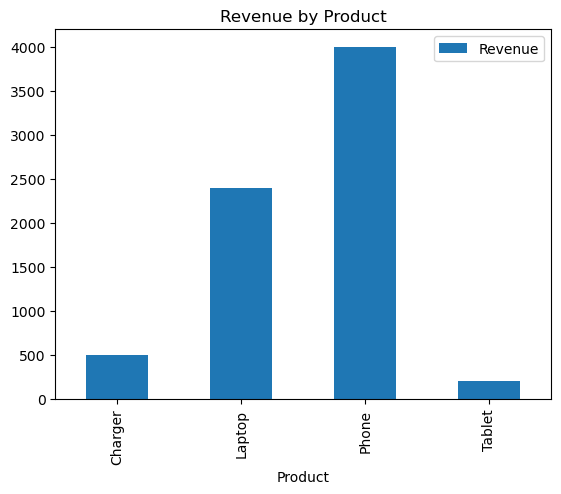

In [4]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='Product', y='Revenue', title='Revenue by Product')
plt.show()
plt.savefig('sales_chart.png')
cur.close()
con.close()